In [ ]:
from notebooks import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


The potoo.default_magic_magic extension is already loaded. To reload it, use:
  %reload_ext potoo.default_magic_magic


In [ ]:
# Default figsize for spectros
figsize(aspect=1/8);

In [ ]:
# Load model
search = Search.load_v0(
    'eval-na-dan170/split_i=0,train=2693,test=674,classes=170', 'n_species=170,n_recs=1.0',
    'cls=logreg_ovr,solver=liblinear,C=0.1,class_weight=balanced',
)
display(
    search,
    search.classifier_,
    len(search.classifier_.classes_),
)

Search(
  n_species=170,
  n_recs=1.0,
  classifier='cls: logreg_ovr,solver: liblinear,C: 0.1,class_weight: balanced',
  random_state=0,
  projection=Projection(
    features=Features(
      load=Load(channels=1, sample_rate=22050, sample_width_bit=16, cache_audio=True),
      sample_rate=22050,
      f_min=1000,
      f_bins=40,
      hop_length=256,
      frame_length=512,
      frame_window='hann',
      patch_length=4
    ),
    skm_fit_max_t=600000,
    k=500,
    variance_explained=0.99,
    do_pca=True,
    pca_whiten=True,
    standardize=False,
    normalize=False,
    agg_funs=['mean', 'std', 'max']
  )
)

LogisticRegression(C=0.1, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=-1, penalty='l2', random_state=0,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

170

In [ ]:
# HACK FIXME Why doesn't search.projection.skm_ exist after unpickle?
projection = Projection.load('peterson-v0-26bae1c', features=Features(load=Load()))
features = projection.features
load = features.load
search.projection = projection
# These both work...
joblib_loads(joblib_dumps(projection)).skm_
joblib_loads(joblib_dumps(search)).projection.skm_

[22:43:21.835] DEBUG  Projection.load
  path: /Users/danb/hack/bubo/features/data/models/projection/peterson-v0-26bae1c.pkl


In [ ]:
recs = load_user_recs(projection,
    # n=10,
)
display(
    df_summary(recs).T,
    recs[:10],
)

[22:43:21.959] DEBUG  Load.audio:in
  len(recs): 164
  len(recs) per dataset: {recordings: 164}
[                                                                                          ] | 0% Completed |  0.0s

[                                                                                          ] | 0% Completed |  0.1s

[##                                                                                        ] | 2% Completed |  0.3s

[##########################################################################                ] | 82% Completed |  0.4s

[##########################################################################################] | 100% Completed |  0.5s

[22:43:22.505] DEBUG  Load.audio:out
  len(audio): 164


[22:43:23.753] WARN   Dropped 1 recs with duplicate audio_id


,recorded_at,dataset,species,species_com_name,species_query,duration_s,samples_mb,samples_n,basename,species_longhand,id,path,audio,audio_sha,feat
audio_id,,,,,,,,,,,,,,,
20171007-c6f4,2017-10-07 15:18:04,recordings,BEWR,Bewick's Wren,BEWR,30.3,1.28,668860,BEWR Bewicks Wren 2 (Coyote Hills parking lot) 2,Bewick's Wren - BEWR,recordings/BEWR Bewicks Wren 2 (Coyote Hills parking lot) 2,recordings/BEWR Bewicks Wren 2 (Coyote Hills parking lot) 2.wav,"box(unbox=recordings/BEWR Bewicks Wren 2 (Coyote Hills parking lot) 2: 1 channels, 16 bit, sampled @ 22.05 kHz, 30.334s long)",c6f4dae698ffb4a89fc86f16534acc42cd22ffa9,[ 4.983e-02 -9.263e-03 -5.601e-02 -3.380e-02 1.946e-02 9.371e-02 2.812e-02 -1.783e-02 8.781e-02 -8.130e-02\n -2.813e-02 -4.650e-02 -4.735e-02 -7.861e-02 -5.890e-02 1.4...
20171007-c6f4,2017-10-07 15:18:04,recordings,BEWR,Bewick's Wren,BEWR,30.3,1.28,668860,BEWR Bewicks Wren 2 (Coyote Hills parking lot),Bewick's Wren - BEWR,recordings/BEWR Bewicks Wren 2 (Coyote Hills parking lot),recordings/BEWR Bewicks Wren 2 (Coyote Hills parking lot).wav,"box(unbox=recordings/BEWR Bewicks Wren 2 (Coyote Hills parking lot): 1 channels, 16 bit, sampled @ 22.05 kHz, 30.334s long)",c6f4dae698ffb4a89fc86f16534acc42cd22ffa9,[ 4.983e-02 -9.263e-03 -5.601e-02 -3.380e-02 1.946e-02 9.371e-02 2.812e-02 -1.783e-02 8.781e-02 -8.130e-02\n -2.813e-02 -4.650e-02 -4.735e-02 -7.861e-02 -5.890e-02 1.4...


[22:43:23.804] DEBUG  Features.spectros:in
  len(recs): 163
  len(recs) per dataset: {recordings: 163}
  sum(duration_h): 3.29
  sum(samples_mb): 498.0
  sum(samples_n): 261204420
[                                                                                          ] | 0% Completed |  0.0s

[                                                                                          ] | 0% Completed |  0.1s

[                                                                                          ] | 0% Completed |  0.2s

[                                                                                          ] | 0% Completed |  0.4s

[                                                                                          ] | 0% Completed |  0.5s

[                                                                                          ] | 0% Completed |  0.6s

[                                                                                          ] | 0% Completed |  0.7s

[                                                                                          ] | 0% Completed |  0.8s

[                                                                                          ] | 0% Completed |  1.0s

[                                                                                          ] | 0% Completed |  1.1s

[##                                                                                        ] | 3% Completed |  1.3s

[#####                                                                                     ] | 6% Completed |  1.4s

[#####                                                                                     ] | 6% Completed |  1.5s

[########                                                                                  ] | 9% Completed |  1.6s

[#########                                                                                 ] | 10% Completed |  1.8s

[#############                                                                             ] | 15% Completed |  1.9s

[#############                                                                             ] | 15% Completed |  2.0s

[#############                                                                             ] | 15% Completed |  2.1s

[################                                                                          ] | 18% Completed |  2.3s

[###################                                                                       ] | 21% Completed |  2.4s

[###################                                                                       ] | 21% Completed |  2.5s

[###################                                                                       ] | 21% Completed |  2.6s

[##############################                                                            ] | 33% Completed |  2.7s

[###################################                                                       ] | 39% Completed |  3.0s

[###################################                                                       ] | 39% Completed |  3.2s

[###################################                                                       ] | 39% Completed |  3.4s

[######################################                                                    ] | 42% Completed |  3.5s

[######################################                                                    ] | 42% Completed |  3.7s

[########################################                                                  ] | 45% Completed |  3.8s

[##########################################                                                ] | 46% Completed |  3.9s

[###########################################                                               ] | 48% Completed |  4.1s

[###########################################                                               ] | 48% Completed |  4.2s

[###########################################                                               ] | 48% Completed |  4.3s

[###########################################                                               ] | 48% Completed |  4.4s

[##############################################                                            ] | 51% Completed |  4.6s

[#################################################                                         ] | 54% Completed |  4.7s

[#################################################                                         ] | 54% Completed |  4.8s

[#################################################                                         ] | 54% Completed |  4.9s

[#################################################                                         ] | 54% Completed |  5.1s

[#################################################                                         ] | 54% Completed |  5.2s

[#########################################################                                 ] | 63% Completed |  5.3s

[#########################################################                                 ] | 63% Completed |  5.4s

[#########################################################                                 ] | 63% Completed |  5.5s

[#########################################################                                 ] | 63% Completed |  5.7s

[#########################################################                                 ] | 63% Completed |  5.8s

[############################################################                              ] | 66% Completed |  5.9s

[############################################################                              ] | 66% Completed |  6.1s

[############################################################                              ] | 66% Completed |  6.2s

[############################################################                              ] | 66% Completed |  6.3s

[##############################################################                            ] | 69% Completed |  6.4s

[#################################################################                         ] | 72% Completed |  6.5s

[#################################################################                         ] | 72% Completed |  6.9s

[#################################################################                         ] | 72% Completed |  7.0s

[#################################################################                         ] | 72% Completed |  7.1s

[####################################################################                      ] | 75% Completed |  7.2s

[####################################################################                      ] | 75% Completed |  7.3s

[####################################################################                      ] | 75% Completed |  7.4s

[####################################################################                      ] | 75% Completed |  7.6s

[######################################################################                    ] | 78% Completed |  7.7s

[######################################################################                    ] | 78% Completed |  7.9s

[######################################################################                    ] | 78% Completed |  8.0s

[######################################################################                    ] | 78% Completed |  8.1s

[######################################################################                    ] | 78% Completed |  8.3s

[########################################################################                  ] | 80% Completed |  8.4s

[#########################################################################                 ] | 81% Completed |  8.6s

[#########################################################################                 ] | 81% Completed |  8.7s

[#########################################################################                 ] | 81% Completed |  8.9s

[###############################################################################           ] | 87% Completed |  9.0s

[####################################################################################      ] | 93% Completed |  9.1s

[####################################################################################      ] | 93% Completed |  9.2s

[#######################################################################################   ] | 96% Completed |  9.3s

[#######################################################################################   ] | 96% Completed |  9.5s

[#######################################################################################   ] | 96% Completed |  9.6s

[#######################################################################################   ] | 96% Completed |  9.7s

[#######################################################################################   ] | 96% Completed |  9.8s

[#######################################################################################   ] | 96% Completed |  9.9s

[##########################################################################################] | 100% Completed | 10.0s

[22:43:33.875] DEBUG  Features.spectros:out
  (f, sum(t)): [40, 1020094]


,,,,,,,,min,25%,50%,75%,max
,dtype,sizeof,len,count,nunique,mean,std,,,,,
audio_id,object,11410,163,163,163.0,NaN,NaN,20160709-1e8c,20160910-3543,20171007-a787,20180513-1a88,20180805-60c3
recorded_at,datetime64[ns],1304,163,163,163.0,NaN,NaN,2016-07-09 18:38:51,2016-09-10 21:27:02,2017-10-07 15:18:55,2018-05-13 17:35:14,2018-08-05 15:57:16
dataset,object,10921,163,163,1.0,NaN,NaN,recordings,recordings,recordings,recordings,recordings
species,object,9943,163,163,35.0,NaN,NaN,AMBI,RTHA,_UNK,_UNK,_UNK
species_com_name,object,10933,163,163,35.0,NaN,NaN,American Bittern,Red-tailed Hawk,Unknown,Unknown,Wilson's Warbler
species_query,object,9943,163,163,35.0,NaN,NaN,AMBI,RTHA,_UNK,_UNK,_UNK
duration_s,float64,1304,163,163,158.0,NaN,NaN,2.75,19.1,48.8,90.8,691
samples_mb,float64,1304,163,163,158.0,NaN,NaN,0.115,0.804,2.05,3.82,29
samples_n,int64,1304,163,163,158.0,NaN,NaN,60544,421573,1076243,2002707,15229220


,recorded_at,dataset,species,species_com_name,species_query,duration_s,samples_mb,samples_n,basename,species_longhand,id,path,audio,audio_sha,feat,spectro
audio_id,,,,,,,,,,,,,,,,
20160709-1e8c,2016-07-09 19:04:03,recordings,CALT,California Towhee,CALT,43.2,1.820,951746,CALT cal towhee,California Towhee - CALT,recordings/CALT cal towhee,recordings/CALT cal towhee.wav,"box(unbox=recordings/CALT cal towhee: 1 channels, 16 bit, sampled @ 22.05 kHz, 43.163s long)",1e8c9cfe8f48560aa30173bb9f20aee30e7ecd71,[ 2.035e-03 6.529e-02 2.609e-01 -8.920e-02 7.727e-02 2.055e-01 2.770e-02 -5.686e-02 4.625e-01 -4.459e-02\n -2.317e-01 1.583e-01 -7.546e-03 -1.656e-01 2.748e-02 -1.4...,
20160709-228d,2016-07-09 20:51:51,recordings,RTHA,Red-tailed Hawk,RTHA,42.1,1.770,928934,"RTHA red tailed hawk, noise",Red-tailed Hawk - RTHA,"recordings/RTHA red tailed hawk, noise","recordings/RTHA red tailed hawk, noise.wav","box(unbox=recordings/RTHA red tailed hawk, noise: 1 channels, 16 bit, sampled @ 22.05 kHz, 42.129s long)",228d2414340927d1c8193963959bb82a6681e6db,[ 1.452e-01 -3.292e-02 6.948e-01 -2.057e-02 -1.251e-02 -2.576e-02 4.741e-02 -4.145e-01 1.621e-01 -1.482e-01\n -1.505e-01 1.070e-01 -3.720e-02 -8.035e-02 -5.857e-03 1.3...,
20160709-4bb7,2016-07-09 19:57:52,recordings,_UNK,Unknown,_UNK,59.9,2.520,1320202,Recording 0019,Unknown - _UNK,recordings/Recording 0019,recordings/Recording 0019.wav,"box(unbox=recordings/Recording 0019: 1 channels, 16 bit, sampled @ 22.05 kHz, 59.873s long)",4bb7924a5092f24d2fede40c339479b1befb6ac0,[ 4.733e-02 2.485e-02 1.041e-01 -2.679e-02 2.001e-02 3.011e-03 9.353e-02 -1.986e-02 9.155e-02 -9.730e-02\n -2.053e-01 3.033e-01 -8.698e-03 -9.605e-02 9.715e-02 1.5...,
20160709-4e73,2016-07-09 19:07:43,recordings,WCSP,White-crowned Sparrow,WCSP,21.9,0.923,483910,WCSP white crowned,White-crowned Sparrow - WCSP,recordings/WCSP white crowned,recordings/WCSP white crowned.wav,"box(unbox=recordings/WCSP white crowned: 1 channels, 16 bit, sampled @ 22.05 kHz, 21.946s long)",4e73e2c74b271647b5406c5784b8af1fd609b8eb,[ 2.455e-02 -1.062e-02 9.811e-01 -9.299e-02 4.945e-02 -5.597e-02 5.669e-02 -2.279e-01 4.159e-01 -7.791e-02\n -1.896e-01 1.582e-01 -4.445e-02 -9.104e-02 6.175e-02 -1.1...,
20160709-59d3,2016-07-09 18:53:03,recordings,RTHA,Red-tailed Hawk,RTHA,30.6,1.290,674360,RTHA red tailed hawk,Red-tailed Hawk - RTHA,recordings/RTHA red tailed hawk,recordings/RTHA red tailed hawk.wav,"box(unbox=recordings/RTHA red tailed hawk: 1 channels, 16 bit, sampled @ 22.05 kHz, 30.583s long)",59d360c416f841fdc19213c1943c73b39992e241,[ 2.229e-02 -1.745e-02 7.496e-01 -5.046e-02 -3.577e-02 -4.409e-02 2.941e-04 -2.590e-01 2.597e-01 2.174e-02\n -1.398e-01 -4.891e-02 -5.807e-03 -9.787e-02 -1.195e-01 -1.8...,
20160709-795e,2016-07-09 20:34:26,recordings,_UNK,Unknown,_UNK,71.2,2.990,1569411,unknown sparrow (song?),Unknown - _UNK,recordings/unknown sparrow (song?),recordings/unknown sparrow (song?).wav,"box(unbox=recordings/unknown sparrow (song?): 1 channels, 16 bit, sampled @ 22.05 kHz, 71.175s long)",795e65fdd0566f69ddfaa13bae28c5e6fde0d3f6,[ 1.549e-01 -4.838e-02 1.737e-01 2.306e-02 3.237e-04 -4.025e-02 1.242e-01 -8.359e-02 2.388e-01 -9.303e-02\n -2.223e-01 2.008e-02 -1.347e-01 -4.654e-02 -5.248e-02 3.6...,
20160709-81dc,2016-07-09 20:59:19,recordings,HAWO,Hairy Woodpecker,HAWO,59.3,2.490,1307828,HAWO hairy woodpecker (2),Hairy Woodpecker - HAWO,recordings/HAWO hairy woodpecker (2),recordings/HAWO hairy woodpecker (2).wav,"box(unbox=recordings/HAWO hairy woodpecker (2): 1 channels, 16 bit, sampled @ 22.05 kHz, 59.312s long)",81dc45758f7932931a1072df74422793bb083cda,[ 6.210e-02 -3.008e-02 9.021e-03 -5.638e-02 1.596e-02 -4.143e-02 6.790e-02 -2.643e-02 1.448e-01 -8.180e-02\n -9.243e-02 1.103e-01 -3.034e-02 -3.102e-02 6.833e-02 -1.6...,
20160709-8c26,2016-07-09 19:51:42,recordings,_UNK,Unknown,_UNK,72.1,3.030,1589856,Recording 0018,Unknown - _UNK,recordings/Recording 0018,recordings/Recording 0018.wav,"box(unbox=recordings/Recording 0018: 1 channels, 16 bit, sam

In [ ]:
# TODO -> util (or model)
def rec_neighbors(rec, recs, projection, k=10):
    # TODO Fit once and reuse
    if k is None:
        k = len(recs)
    recs_clean_ix = recs.reset_index()
    knn_search = Search(projection=projection, classifier='cls: knn')
    knn_search.fit(*Search.Xy(recs_clean_ix))
    ([dist], [rec_i]) = knn_search.classifier_.kneighbors(
        Search.X(pd.DataFrame([rec])),
        n_neighbors=k + 1,  # +1 in case we throw out rec as the first result
    )
    rec_audio_id = rec.get('audio_id', rec.name)
    return (recs_clean_ix.loc[rec_i]
        .assign(dist=dist)
        .pipe(df_reorder_cols, first=['dist'])
        [lambda df: df.audio_id != rec_audio_id]  # Filter out rec in case it's in the candidate set
        [:k]  # Limit k+1 -> k in case rec wasn't in the candidate set
    )

In [ ]:
# TODO This is just a mock kneighbors using knn(recordings). Next steps:
#   - [ ] [first] How to combine with search preds? This is the meat! See thoughts and tasks in notebook!
#   - [ ] [after] Make a real kneighbors using knn(xc_dan_170), like search.
#       - Fire up a remote, or is it fast enough to .transform and .fit locally?

20180805-60c3  2018-08-05T15:57:16  BEWR  30.2s  BEWR - vollmer peak


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
species,PUFI,OATI,LISP,BARS,DOWO,BEWR,HUVI,BAWW,GCWA,LASP,PISI,RCSP,RCKI,AMRO,BTPI
p,0.321,0.158,0.099,0.0827,0.0569,0.0448,0.0341,0.0335,0.0259,0.024,0.0157,0.0144,0.011,0.00926,0.00652


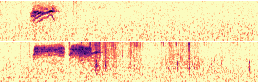

In [ ]:
show_audio = False
query = (recs
    .loc['20180805-60c3']  # BEWR
    .pipe(projection.with_audio, lambda audio: audio[6500:])
)
print(rec_str_line(query))
display(rec_probs(query, search, 15))
plot_spectro_micro(query, features, wrap=True,
    # limit_s=60,
    show_audio=False,
)

 43.9  20170819-8661  2017-08-19T16:27:21  _UNK  4.7s  UNK_20170819_092720


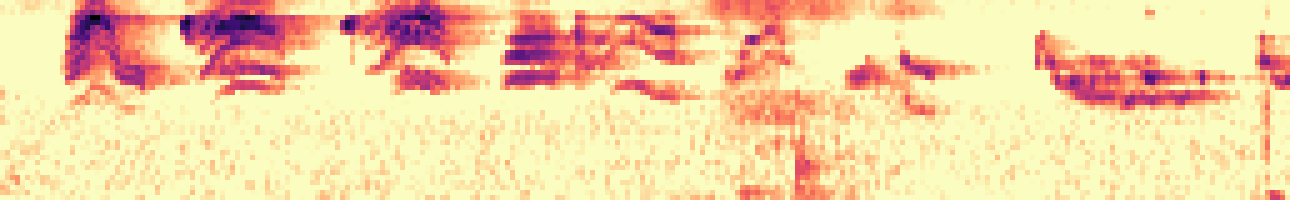

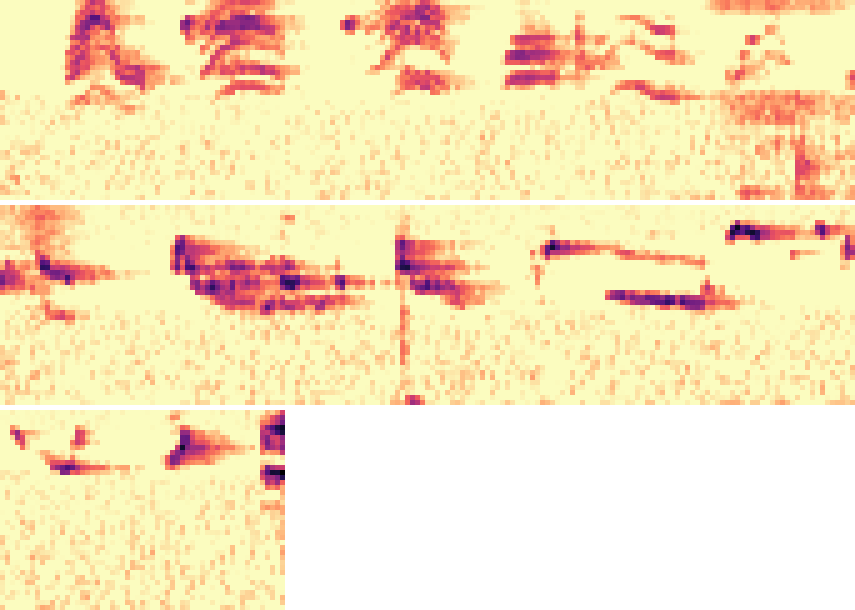

In [ ]:
# print()
with log.context(level='info'):
    results = rec_neighbors(query, recs, projection,
        # k=30,
        k=1,
    )
for result in df_rows(results):
    print(rec_str_line(result, ('dist', '%5.1f')))
    plot_spectro(result,
        raw=True, scale=5,
    )
    print()
    plot_spectro_micro(result, features,
        # wrap=False,
        show_audio=False,
        wrap_s=2,
        scale=5,
    )